# Random Forest Regressor:

---------


###  Index: 

- 1) [Importing the Data](#Importing)
- 2) [Shifting the Dates](#Shifting)
- 3) Train and Test Set:
    - 3a. [Manually Splitting the Data](#Splitting) to Predict 2017 & onwards.
- 4) [Normalizing the Data](#Norm)
- 5) Supervised Machine Learning Models:
    - [Random Forest Regression Model](#RFModel)
    - [Principal Component Analysis](#PCA)
    - [Gridsearch Pipeline](#Gridsearch)

---------

## Importing Libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys

sys.path.append('..')

-----

## Company Name

**Company Options:**

- Apple, Inc. - `Apple`
- Facebook, Inc. -`Facebook`
- Google LLC - `Google`
- JPMorgan Chase & Co. - `JPMorgan`
- The Goldman Sachs Group, Inc. - `GoldmanSachs`
- Moody's Corporation - `Moodys`
- The International Business Machines Corporation (IBM) - `IBM`
- Twitter Inc. - `Twitter`
- BlackRock, Inc. - `BlackRock`
- Microsoft Corporation - `Micrisoft`

In [5]:
company_name = 'Apple'

---
<a class="anchor" id="Importing"></a>

## Importing the Data:
The data is being imported using a custom function.

In [6]:
from lib.helper import data_importer

In [7]:
df = data_importer(company_name)

In [8]:
df.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


-------
<a class="anchor" id="Shifting"></a>

## Importing the Shifted Data Set:
The data is being shifted using a custom function.

In [9]:
from lib.helper import df_shift_importer

In [10]:
df_shift = df_shift_importer(company_name)

In [11]:
df_shift.head()

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07
1981-04-20,25.12,25.12,25.00,25.00,106600.0,0.0,1.0,0.369335,0.369335,0.367570,...,27.038054,27.038054,383685.301297,0.0,1.0,0.398549,0.399838,0.397535,0.397535,2.148638e+07
1981-04-21,25.75,25.87,25.75,25.75,157800.0,0.0,1.0,0.378597,0.380362,0.378597,...,27.008099,27.008099,378432.154755,0.0,1.0,0.398085,0.399385,0.397095,0.397095,2.119220e+07
1981-04-22,27.50,27.62,27.50,27.50,127400.0,0.0,1.0,0.404327,0.406092,0.404327,...,27.019539,27.019539,372594.197668,0.0,1.0,0.398231,0.399541,0.397263,0.397263,2.086528e+07


### Taking a Look at the Time-Shifted Data Set:

In [12]:
df_shift.tail(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-23,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,...,169.691723,171.097703,3.358258e+07,0.000518,1.0,171.126419,172.657153,169.671634,171.077463,3.358258e+07
2018-03-26,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,...,169.581218,170.954500,3.373761e+07,0.000506,1.0,171.062781,172.593499,169.561596,170.934731,3.373761e+07
2018-03-27,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,...,169.508167,170.996721,3.379657e+07,0.000494,1.0,170.993182,172.605278,169.489000,170.977412,3.379657e+07


-------
<a class="anchor" id="Splitting"></a>

# Splitting the Data into a Training and Testing Set
 Split the Data to Predict 2017 and onwards using a custom function.

In [13]:
from lib.helper import import_split_data

### Splitting the Data into a Train and Test Set:

In [14]:
X_train, X_test = import_split_data(company_name)

### Taking a Look at the Train Set:

In [15]:
X_train.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07


### Taking a Look at the Test Set:

In [16]:
X_test.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.65,117.20,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,...,110.936682,111.809549,3.262264e+07,0.006808,1.0,109.969134,110.881942,109.289159,110.149132,3.262266e+07
2017-01-04,115.80,116.33,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,...,111.025596,111.910490,3.253332e+07,0.006650,1.0,110.071473,110.975226,109.383424,110.255324,3.253334e+07


-----
<a class="anchor" id="Norm"></a>

# Normalizing the Data with a MinMaxScaler
**MinMaxScaler**: transforms features by scaling each feature to a given range, estimating and translating each feature individually such that it is in the given range on the training set. (i.e. between zero and one.) 

For this example, we will use the range (0, 1).

A helper function will be imported and will do the scaling.

In [17]:
from lib.helper import mm_scaler

In [18]:
X_train_sc, X_test_sc, y_train, y_test = mm_scaler(X_train, X_test, df)

-----
<a class="anchor" id="RFModel"></a>

# Random Forest Regression Model

## Setting up the Random Forest (RF) Regressor:

- **Random Forest:** is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses the average to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size, but the samples will be drawn with replacement if the bootstrap option is set to "True."

In [40]:
def rf_model(X_train, y_train, X_test, y_test, n_estimators, max_depth, min_samples_leaf, bootstrap):
    """
    Returns the fitted model using the Random Forest Regressor Model from SK-Learn.
    Prints the Training Score, Testing score, & the average price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not. 
    
    Bagging Regressor Parameters
    -------------------------------------------------------------------------------------------------------------
    
    n_estimators : int
        Passes the number of estimators to be used in the Bagging Regressor Model.  
    
    max_depth : int
    
    min_leaf_samples : int
        Passes the maximum number of samples to be used in the Bagging Regressor Model.    
    
    bootstrap : boolean
        Passes boolean condition be used in the Bagging Regressor Model. >> True or False     
    """
    
    # Instatiating the Random Forest Regresssor.
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                           min_samples_leaf=min_samples_leaf, bootstrap=bootstrap, 
                           n_jobs=3, random_state=42)
    
    # Fitting the Training and Holdout using the Random Forest Regressor.
    rf.fit(X_train, y_train)
    # Scoring the Training Sets.
    train_score = rf.score(X_train, y_train)
    # Scoring the Test Sets.
    test_score = rf.score(X_test, y_test)
    # Getting the Average Predictions.
    prediction = rf.predict(X_test).mean()
    
    # Plotting the Results: Actual Price and Predicted Price.
    plt.figure(figsize=(14,7))
    sns.set_style("darkgrid")
    sns.regplot(y_test, rf.predict(X_test))
    # Adding the Title, X & Y Labels, and legend.
    plt.title('Random Forest Regression: Predicted and Actual Prices', fontsize=18)
    plt.xlabel('Actual', fontsize=16)
    plt.ylabel('Predicted', fontsize=16)
    plt.legend()
    plt.tight_layout()
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {prediction}') 
    return rf

### Training a Random Forest Regression Model:

#### Evaluation:

- The results are HORRIBLE! The model is underfit and forecasts the price poorly; as shown on the graph below. This result was expected since a random forest will cluster its results due to its decision-tree-like nature. The inefficiency is demonstrated in the graph as we analyze the clusters in the predicted price provided by the model.

No handles with labels found to put in legend.


Train Score: 0.9980309556999277
Test Score: -2.8253465187771045
Predictive Mean: 179.61515994246955


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

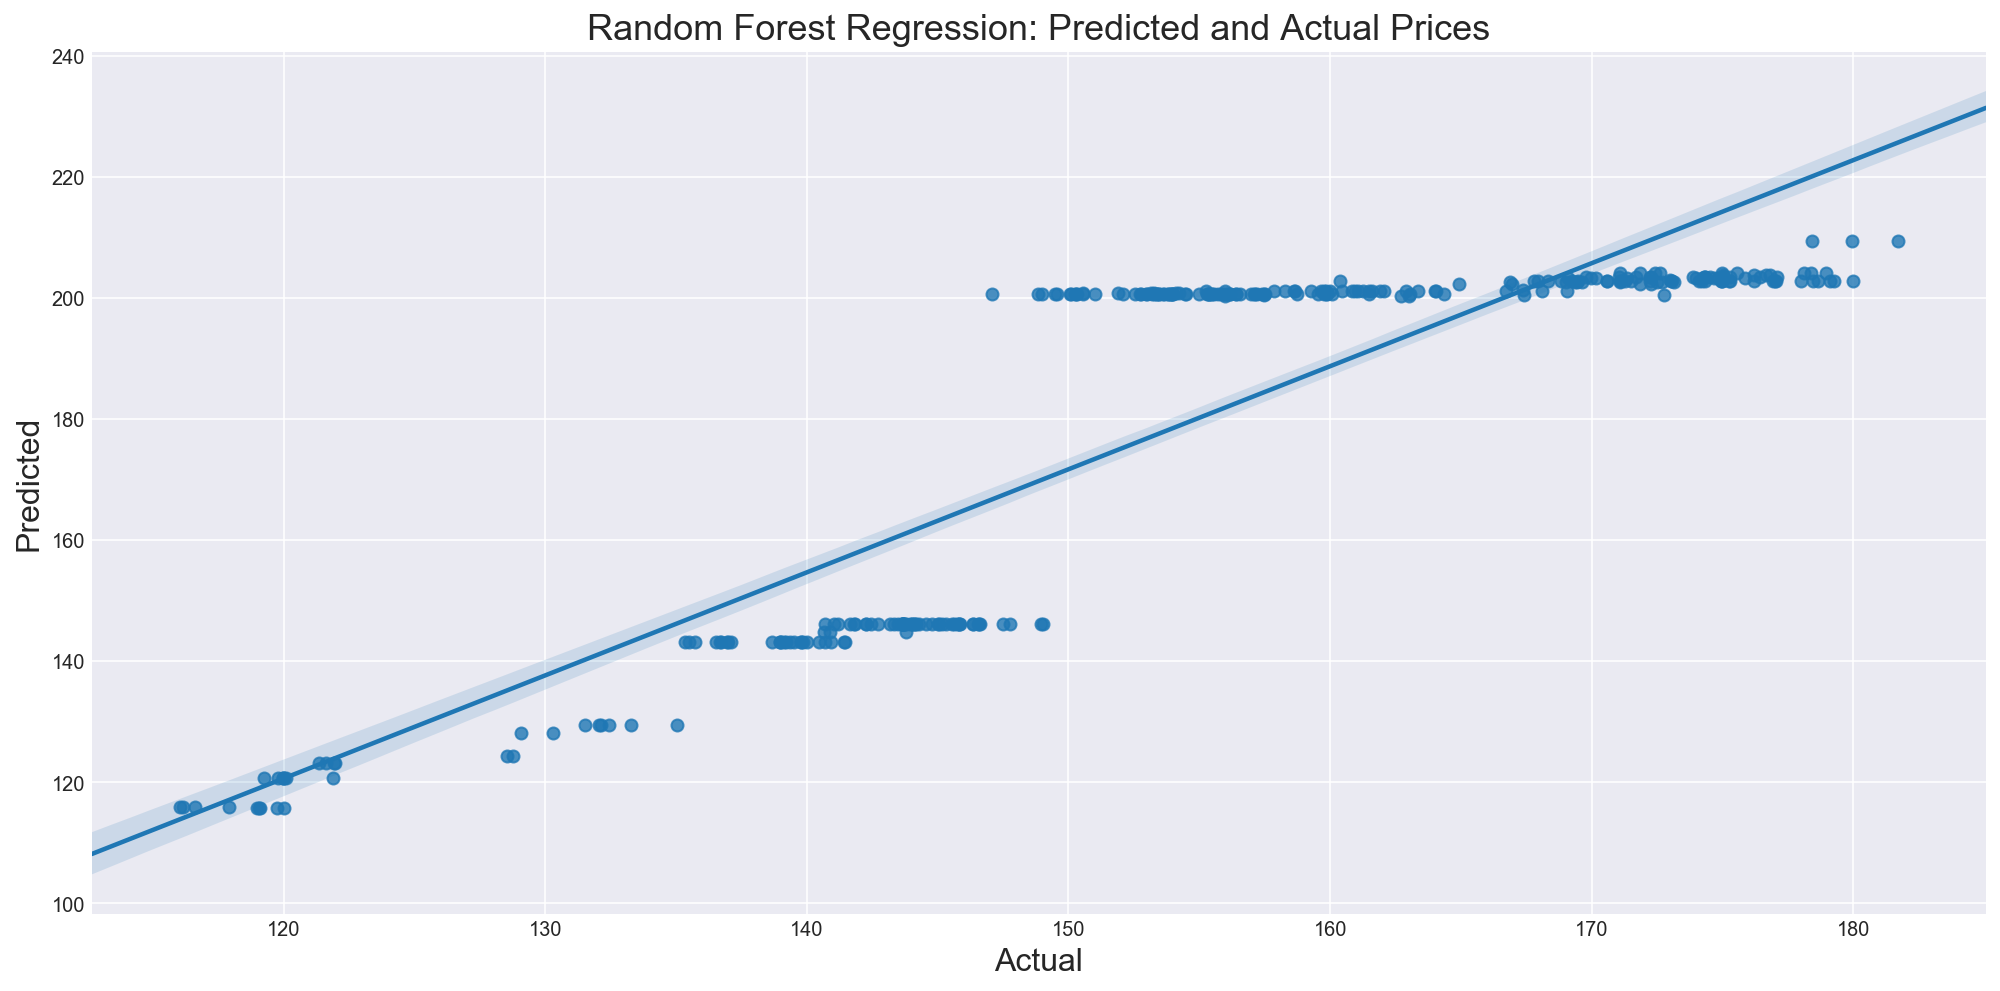

In [41]:
rf_model(X_train_sc, y_train, X_test_sc, y_test, 
         n_estimators=100, max_depth=15, 
         min_samples_leaf= 15, bootstrap=False)

-----
<a class="anchor" id="PCA"></a>

## Decomposing Signal Components with Principal Component Analysis (PCA):

Sometimes, centering and scaling the features independently is not enough, since a downstream model can further make some assumption on the linear independence of the features.

To address this issue, **Principal Component Analysis** (PCA) is used to decompose signal components.

- **Principal Component Analysis**: reduces linear dimensionality using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space.

The function being imported is a custom function, similar to the PCA function provided in the 3rd notebook.

In [42]:
from lib.helper import pca_decomposition

In [43]:
X_train_pca, X_test_pca = pca_decomposition(X_train_sc, X_test_sc, 2)

### Training a Random Forest Model with PCA Decomposition:

#### Evaluation:

- Again, and as expected, the scores are HORRIBLE! PCA did not help very much as the model only increased .05 in performance.
- The inefficiency of this model is similar to the regular random forest regression model as the predicted prices are clustered due to the decision tree nature of the model.

No handles with labels found to put in legend.


Train Score: 0.9938805667742192
Test Score: -2.3242951922466637
Predictive Mean: 128.95814929703522


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

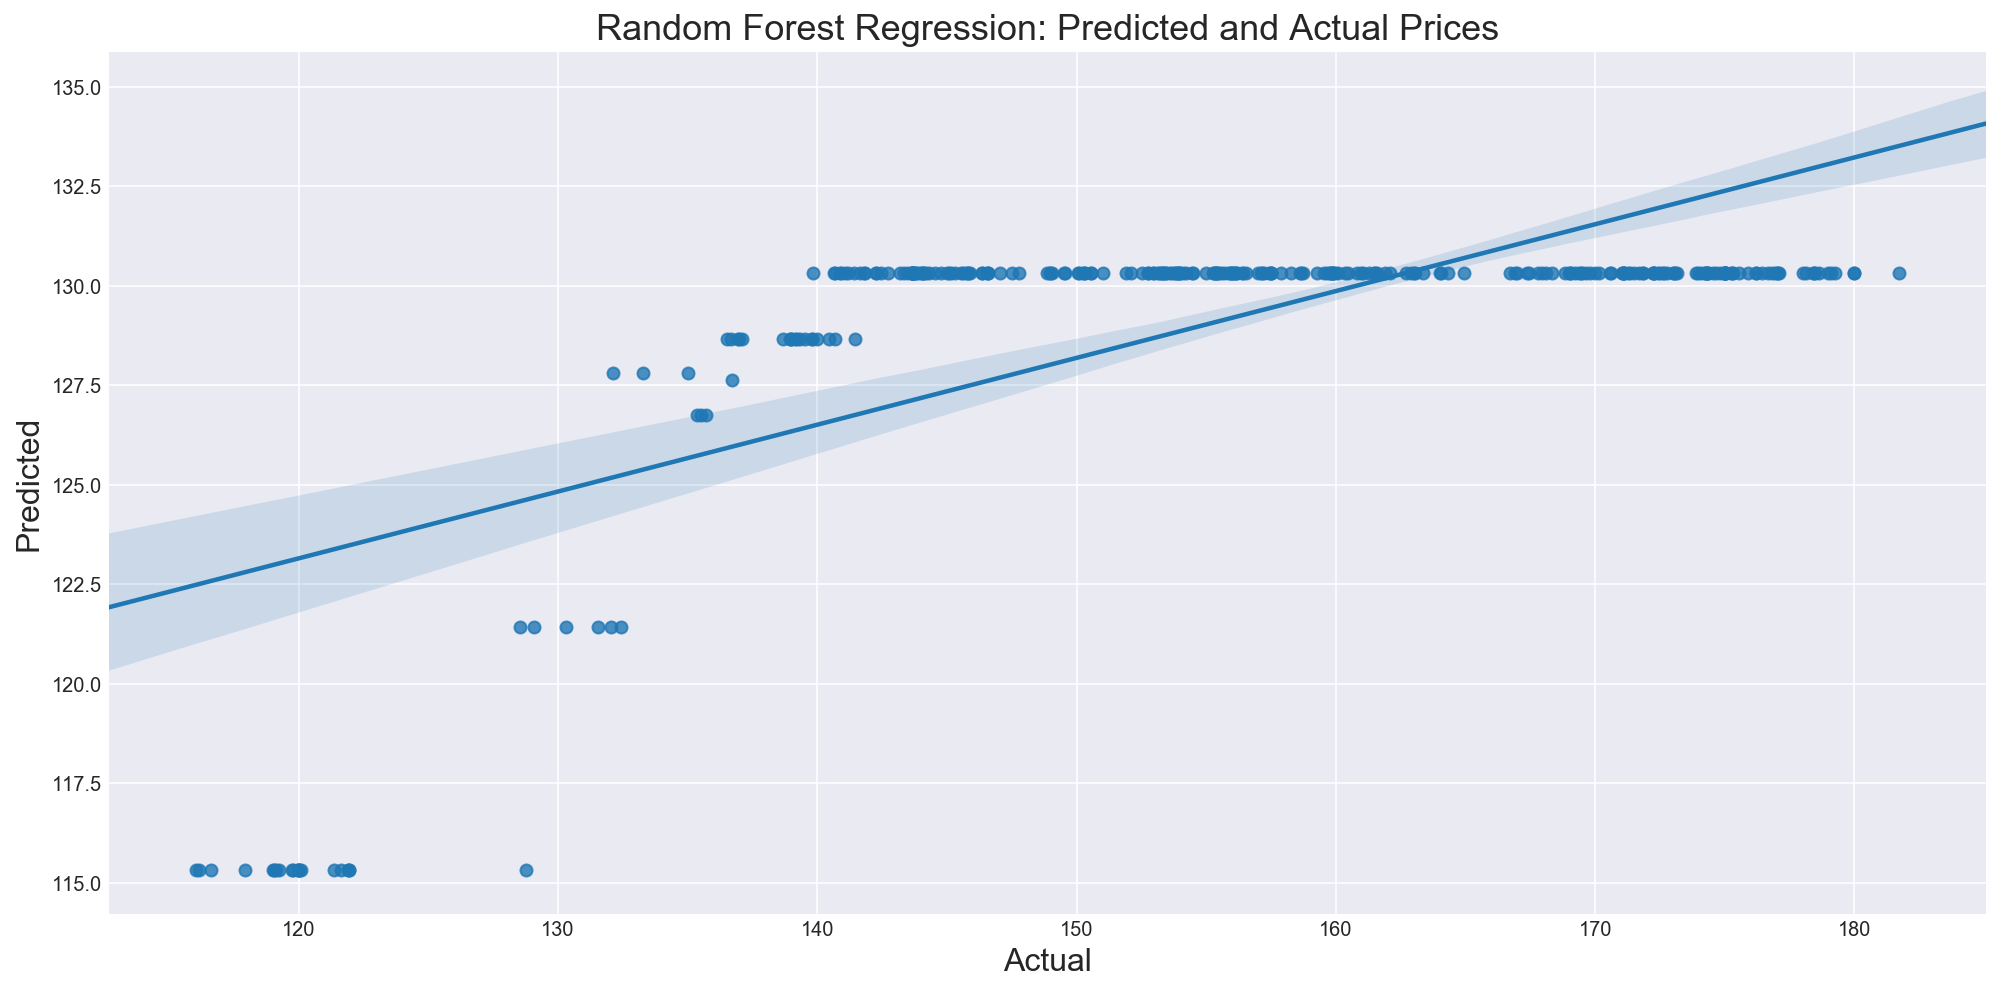

In [44]:
rf_model(X_train_pca, y_train, X_test_pca, y_test, 
         n_estimators=100, max_depth=10, 
         min_samples_leaf= 8, bootstrap=False)

-----
<a class="anchor" id="Gridsearch"></a>

# Grid Searching a Random Forest Regression Model:

- **GridSearch:** is an exhaustive search over specified parameter values for an estimator.

In [24]:
from sklearn.model_selection import GridSearchCV

### Creating a Pipeline

In [25]:
pipe = Pipeline([
    ('rf', RandomForestRegressor())
])

### Setting up the Parameters:

In [26]:
# Number of trees to consider in random forest
n_estimators = [x for x in range(8, 14, 2)]

# Number of features to consider at every split
max_features = ['auto', 'log2']

# Maximum number of levels in tree to consider
max_depth = [x for x in range(1, 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [x for x in range(1, 3)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [33]:
params = {'rf__n_estimators': n_estimators,
           'rf__max_features': max_features,
           'rf__max_depth': max_depth,
           'rf__min_samples_leaf': min_samples_leaf,
           'rf__bootstrap': bootstrap}
print(params)

{'rf__n_estimators': [8, 10, 12], 'rf__max_features': ['auto', 'log2'], 'rf__max_depth': [1, 2, None], 'rf__min_samples_leaf': [1, 2], 'rf__bootstrap': [True, False]}


### Gridsearching the Parameters:

In [34]:
rf_search = GridSearchCV(pipe, params, n_jobs=3)

### Fitting the Scaled Data with the Model:

In [35]:
rf_search.fit(X_train_sc, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'rf__n_estimators': [8, 10, 12], 'rf__max_features': ['auto', 'log2'], 'rf__max_depth': [1, 2, None], 'rf__min_samples_leaf': [1, 2], 'rf__bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Scoring the Training Data:

In [36]:
rf_search.score(X_train_sc, y_train)

0.9989480233309087

### Scoring the Test Data:

In [37]:
rf_search.score(X_test_sc, y_test)

-2.2219486568126796

#### Evaluation:

- I wanted to surpass the -2.32 score that we saw in the regular random forest with PCA model so, I tried GridSearching the parameters just out of curiosity.
- Resulting in a better score! Kind of, this model scored a -2.22, which is STILL HORRIBLE, but I beat the model I was comparing it too.
- Again, we can see the inefficiency in the clusters graphed below.


### Plotting the Results:

No handles with labels found to put in legend.


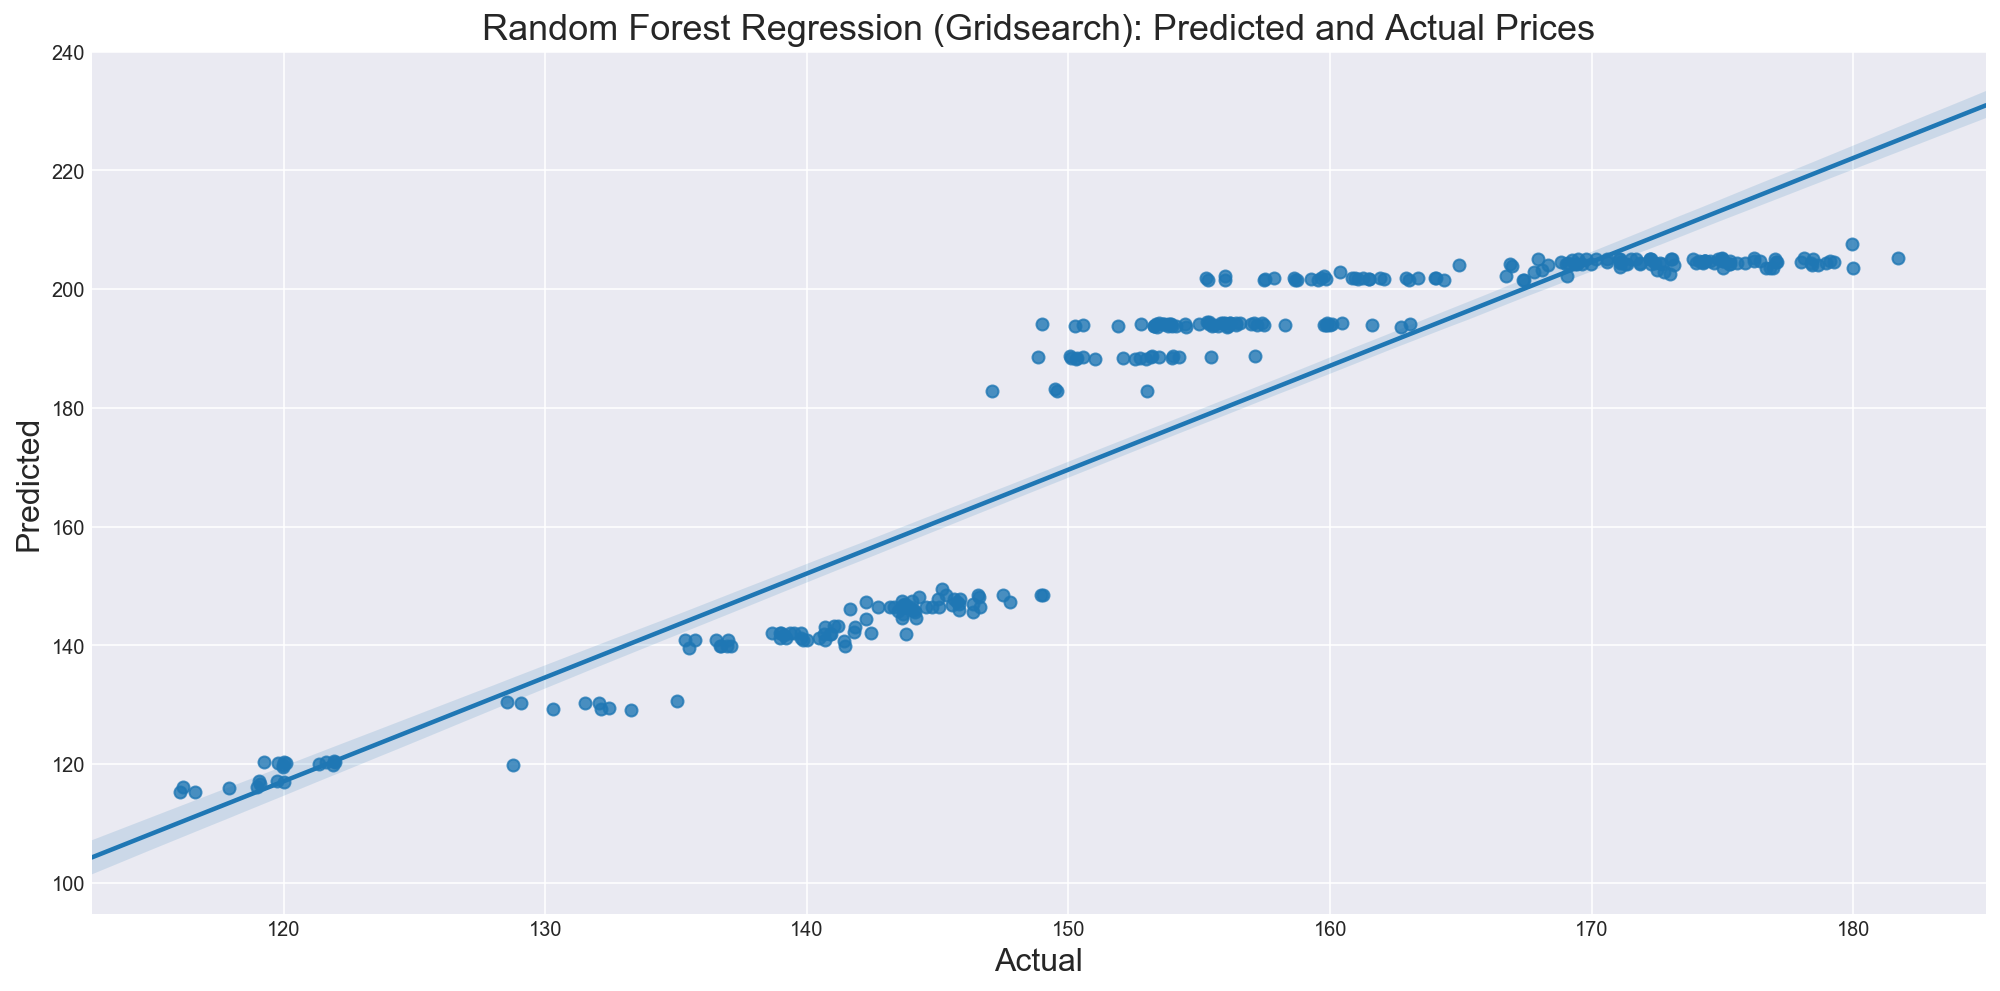

In [47]:
plt.figure(figsize=(14,7))
sns.set_style("darkgrid")
sns.regplot(y_test, rf_search.predict(X_test_sc))
plt.title('Random Forest Regression (Gridsearch): Predicted and Actual Prices', fontsize=18)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.legend()
plt.tight_layout()